In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

from ResultsManager import Results, ResultsManager

In [2]:
# COMPARING THE EFFICIENCY IN INFERENCE OF full, naive AND sym
# All numbers were generated on a A100 GPU (with SXM4)
# time is in seconds, memory is in MB

# k=10
# kq_dim=10
# val_dim=10
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method full 
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method naive
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method sym
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method flash_attn --dtype fp16 

sqrt10 = np.sqrt(10)
Ns_complete = [1e2, sqrt10*1e2, 1e3, sqrt10*1e3, 1e4, sqrt10*1e4, 1e5, sqrt10*1e5, 1e6, sqrt10*1e6, 1e7, sqrt10*1e7, 1e8]
Ns_complete = [int(N) for N in Ns_complete]

# larger N possible
full_forward_means = [np.float64(0.0006433486938476563), np.float64(0.0008251667022705078), np.float64(0.0006687164306640625), np.float64(0.0007021427154541016), np.float64(0.0026097774505615236), np.float64(0.024758100509643555), np.float64(0.245750093460083), np.float64(2.5004335403442384), np.float64(24.49567856788635)]
full_forward_stds = [np.float64(4.923296898164901e-05), np.float64(0.00042250180552535815), np.float64(0.00013703418894502278), np.float64(7.504695823768514e-06), np.float64(5.171869988615513e-06), np.float64(0.0006645457611053782), np.float64(3.81784309374988e-05), np.float64(0.00034071933927210234), np.float64(0.0010641394171907426)]
full_peak_means = [np.float64(8.2177734375), np.float64(8.9365234375), np.float64(15.9091796875), np.float64(84.890625), np.float64(772.591796875), np.float64(7641.9716796875), np.float64(38335.15234375), np.float64(38335.15234375), np.float64(38335.15234375)]
full_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
full_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
full_results = Results(
    label="full attention",
    Ns=Ns_complete[:len(full_forward_means)],
    forward_means=full_forward_means,
    forward_stds=full_forward_stds,
    peak_means=full_peak_means,
    peak_stds=full_peak_stds
)


# larger N possible
naive_forward_means = [np.float64(0.002063941955566406), np.float64(0.001998615264892578), np.float64(0.0020865440368652345), np.float64(0.0021854400634765624), np.float64(0.004998254776000977), np.float64(0.030974578857421876), np.float64(0.26235065460205076), np.float64(2.621561336517334), np.float64(26.67010178565979)]
naive_forward_stds = [np.float64(6.586835266588235e-05), np.float64(1.158763350715953e-05), np.float64(9.242034133079393e-06), np.float64(3.025741246744599e-05), np.float64(1.7961893080447275e-05), np.float64(0.0010338275119464364), np.float64(0.00013111795888292213), np.float64(0.0010785798007319262), np.float64(0.006276016198441476)]
naive_peak_means = [np.float64(8.26806640625), np.float64(8.6162109375), np.float64(12.80712890625), np.float64(48.99755859375), np.float64(398.22216796875), np.float64(3865.58447265625), np.float64(38538.86328125), np.float64(38538.86328125), np.float64(38538.86328125)]
naive_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
naive_results = Results(
    label="$k$-MIP attention: naive",
    Ns=Ns_complete[:len(naive_forward_means)],
    forward_means=naive_forward_means,
    forward_stds=naive_forward_stds,
    peak_means=naive_peak_means,
    peak_stds=naive_peak_stds
)

# larger N possible
sym_forward_means = [np.float64(0.0016697883605957032), np.float64(0.0016876220703125), np.float64(0.0018877506256103516), np.float64(0.002139759063720703), np.float64(0.003139638900756836), np.float64(0.006375169754028321), np.float64(0.034453821182250974), np.float64(0.23143558502197265), np.float64(2.146422100067139), np.float64(20.96626091003418)]
sym_forward_stds = [np.float64(8.691377213615766e-05), np.float64(4.0342114460456197e-05), np.float64(3.2665050768359026e-05), np.float64(2.4639334576657045e-05), np.float64(9.013352499841369e-05), np.float64(3.125506621697168e-05), np.float64(1.0385202415443942e-05), np.float64(5.019317576716099e-05), np.float64(0.0002833185427679559), np.float64(0.0032899288796192)]
sym_peak_means = [np.float64(0.14306640625), np.float64(0.447265625), np.float64(1.4150390625), np.float64(4.466796875), np.float64(14.1171875), np.float64(44.63427734375), np.float64(141.14501953125), np.float64(446.337890625), np.float64(1411.43798828125), np.float64(4463.3583984375)]
sym_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
sym_results = Results(
    label="$k$-MIP attention: symbolic matrices",
    Ns=Ns_complete[:len(sym_forward_means)],
    forward_means=sym_forward_means,
    forward_stds=sym_forward_stds,
    peak_means=sym_peak_means,
    peak_stds=sym_peak_stds
)


# larger N possible
flash_attn_forward_means = [np.float64(0.00019593238830566405), np.float64(0.00017218589782714845), np.float64(0.00017375946044921874), np.float64(0.000180816650390625), np.float64(0.0002946376800537109), np.float64(0.001804494857788086), np.float64(0.013100910186767577), np.float64(0.11548552513122559), np.float64(0.9154133796691895), np.float64(9.08273401260376)]
flash_attn_forward_stds = [np.float64(6.874536685697086e-05), np.float64(1.1291479742178965e-05), np.float64(1.1543399358800325e-05), np.float64(8.340698396334164e-06), np.float64(8.26649166319721e-06), np.float64(8.476442735019292e-07), np.float64(1.8462528857227736e-05), np.float64(0.00462678666225354), np.float64(0.00021989070370914972), np.float64(0.012303583657874626)]
flash_attn_peak_means = [np.float64(0.0205078125), np.float64(0.1396484375), np.float64(0.68994140625), np.float64(2.17333984375), np.float64(6.8681640625), np.float64(6.8681640625), np.float64(18.3125), np.float64(57.90576171875), np.float64(183.10693359375), np.float64(579.033203125)]
flash_attn_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
flash_results = Results(
    label="FlashAttention (fp16)",
    Ns=Ns_complete[:len(flash_attn_forward_means)],
    forward_means=flash_attn_forward_means,
    forward_stds=flash_attn_forward_stds,
    peak_means=flash_attn_peak_means,
    peak_stds=flash_attn_peak_stds,
)

In [3]:
results_manager = ResultsManager()
results_manager["full"] = full_results
results_manager["naive"] = naive_results
results_manager["sym"] = sym_results
results_manager["flash"] = flash_results

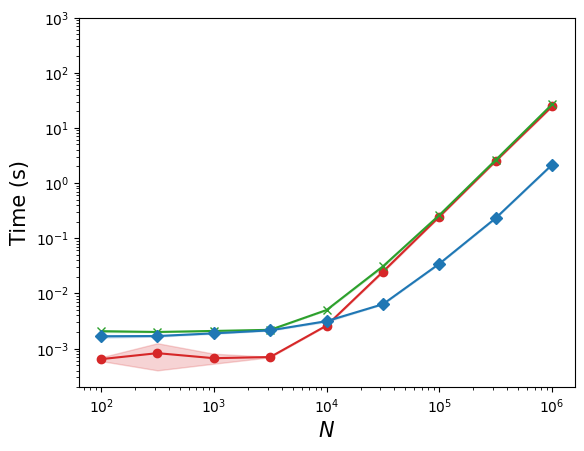

ValueError: operands could not be broadcast together with shapes (9,) (6,) 

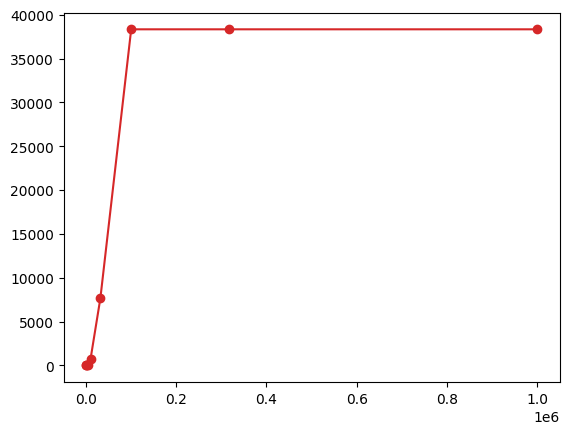

In [5]:
results_manager.display_settings.display_flash = False
results_manager.display_settings.max_N = 1e6
results_manager.display_settings.ylim = [2e-4, 1e3]


results_manager.show_forward(
    save_path=Path('/home/jonas/ICML-thesis-submission/figures/Efficiency-inference-forward.png'),
    show_legend=False
)

results_manager.display_settings.ylim = None
results_manager.show_peak(
    save_path=Path('/home/jonas/ICML-thesis-submission/figures/Efficiency-inference-peak.png'),
    show_legend=True
)